# Test `velocity_section_and_surface` Module

Render figure object produced by the `nowcast.figures.research.velocity_section_and_surface` module.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker
to help ensure that the module will work in the nowcast production context.

This notebook must be run in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
Also, it must be run on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
# reload lets us pull in changes from modules that we edit
from importlib import reload

In [2]:
# imports from the top of the make_plots worker that we need for the test
from pathlib import Path

import arrow
import netCDF4 as nc

from nowcast.figures.research import velocity_section_and_surface

In [3]:
import io

import yaml

Python and library versions:

In [4]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.1'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.4.1'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


The bits of `config/nowcast.yaml` that are required:

In [5]:
config = '''
    run_types:
        nowcast-green:
            bathymetry: /SalishSeaCast/grid/bathymetry_202108.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask202108.nc
        nowcast:
            bathymetry: /SalishSeaCast/grid/bathymetry_202108.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask202108.nc

    run:
        results_archive:
            nowcast-green: /results2/SalishSea/nowcast-green.202111/
            nowcast: /results/SalishSea/nowcast-blue.202111/
'''

config = yaml.safe_load(io.StringIO(config))

In [6]:
run_type = 'nowcast'
plot_type = 'research'
run_date = arrow.get('2025-01-25')

In [7]:
dmy = run_date.format('DDMMMYY').lower()
results_dir = Path(config['run']['results_archive'][run_type], dmy)
bathy = nc.Dataset(config['run_types'][run_type]['bathymetry'])
mesh_mask = nc.Dataset(config['run_types'][run_type]['mesh_mask'])

In [8]:
yyyymmdd = run_date.format('YYYYMMDD')

In [10]:
U = nc.Dataset(results_dir/f'SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_U.nc')
V = nc.Dataset(results_dir/f'SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_V.nc')
U_var = U.variables['vozocrtx']
V_var = V.variables['vomecrty']

4.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


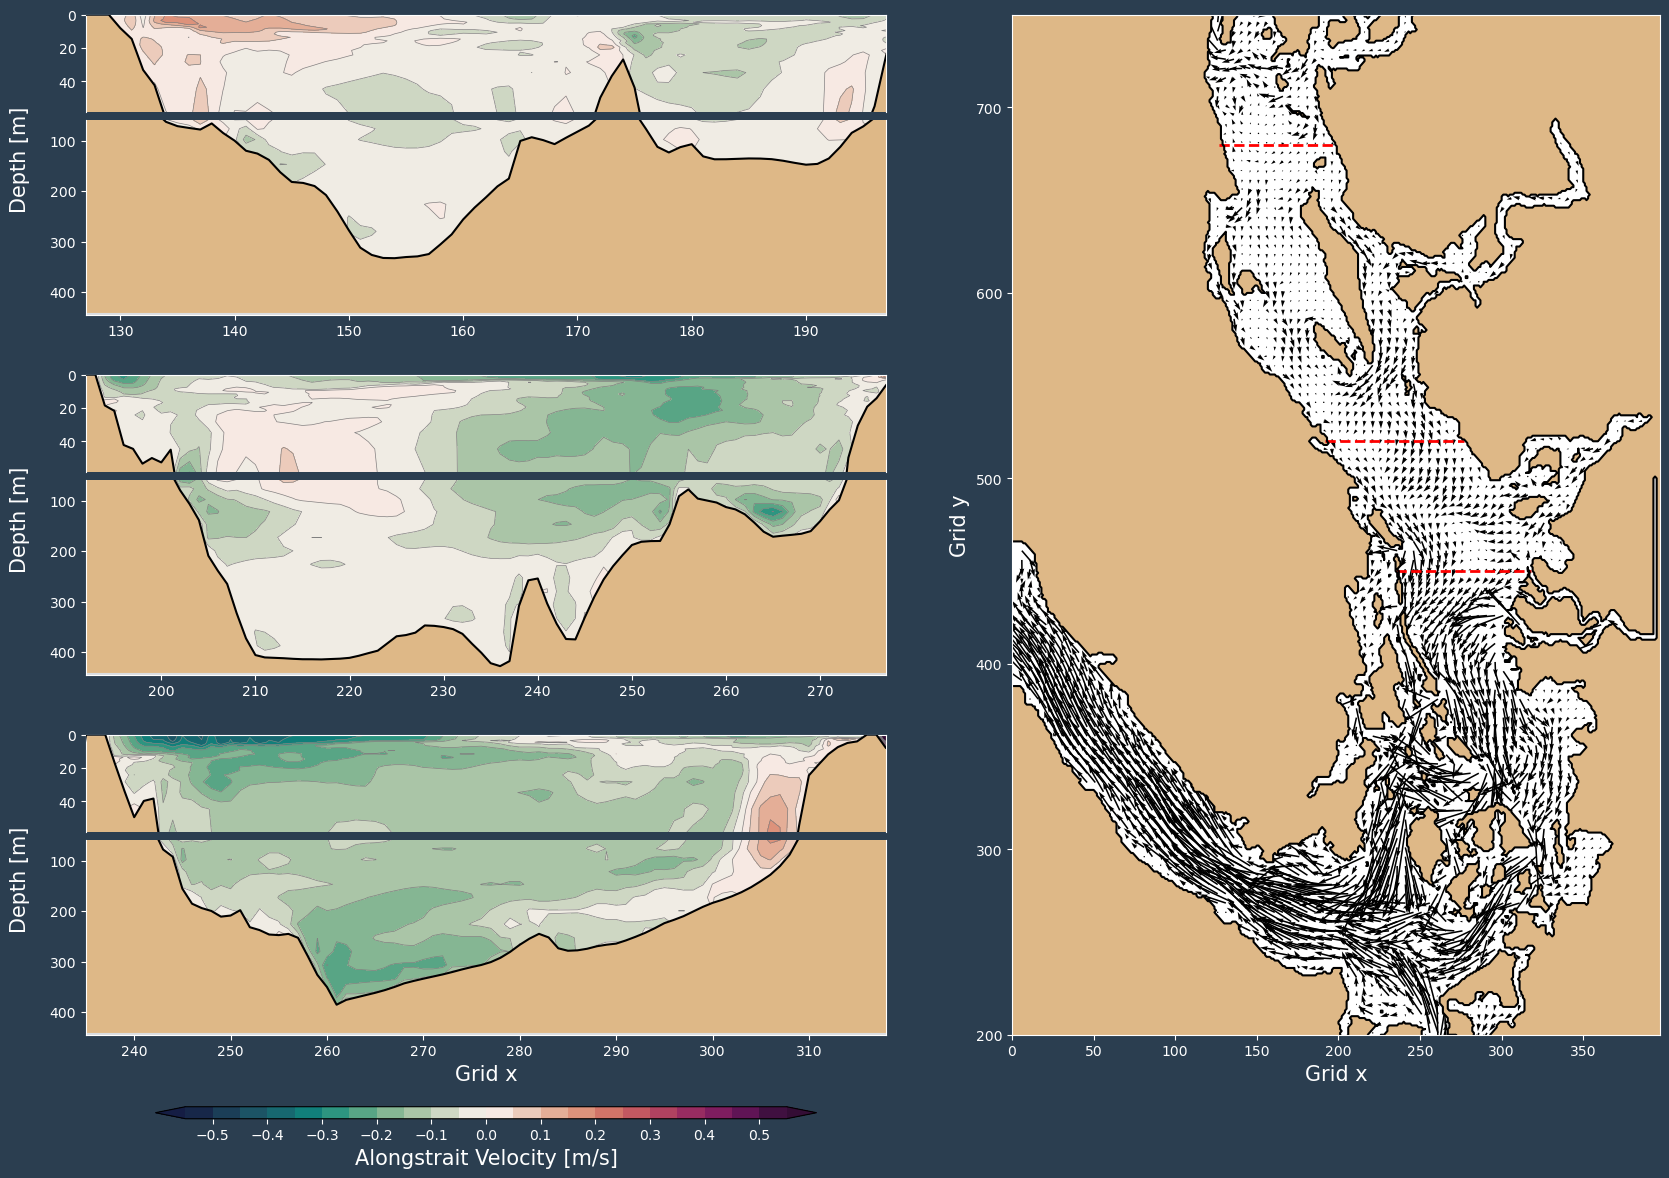

In [11]:
%%timeit -n1 -r1

reload(velocity_section_and_surface)

# Layout parameters
sections = (450, 520, 680)
pos = (
    (0.1, 0.35),
    (0.4, 0.65),
    (0.7, 0.95)
)
section_lims = (
    (235, 318, 0, 445),
    (192, 277, 0, 445),
    (127, 197, 0, 445),
)

# Make figure
fig = velocity_section_and_surface.make_figure(
    U_var, V_var, bathy, mesh_mask,
    sections=sections, pos=pos, section_lims=section_lims
)